<a href="https://colab.research.google.com/github/nescoba/DIP/blob/main/vanillaSLSDy_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
sns.set()

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


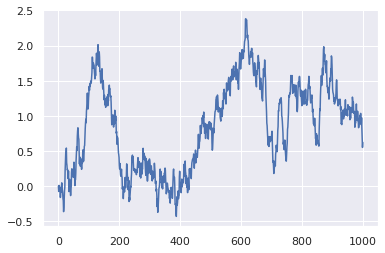

In [7]:
def mu(t, x):
    return x*(1 - x)

def sigma(t, x):
    return 1 

h = 0.01
M = 1000

x=[0]

for m in range(1, M):
    x_new = x[m-1] + mu((m-1)*h, x[m-1])*h + sigma((m-1)*h, x[m-1])*np.sqrt(h)*np.random.standard_normal(size=1)
    x.append(x_new)

plt.plot(np.arange(M), x)

In [32]:
x = np.vstack(x)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
X = poly.fit_transform(x[1:])

In [34]:
x_ts = pd.Series(x[:, 0])

In [35]:
import statsmodels.api as sm
modelmu = sm.OLS(x_ts.diff()[1:], X)
resultmu = modelmu.fit()
print(resultmu.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.287
Date:                Fri, 11 Mar 2022   Prob (F-statistic):            0.00597
Time:                        15:47:12   Log-Likelihood:                 939.13
No. Observations:                 999   AIC:                            -1866.
Df Residuals:                     993   BIC:                            -1837.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0066      0.007     -0.964      0.3

In [36]:
modelsigma = sm.OLS(x_ts.diff()[1:]*x_ts.diff()[1:], X)
resultssigma = modelsigma.fit()
print(resultssigma.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.448
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.205
Time:                        15:51:07   Log-Likelihood:                 3030.7
No. Observations:                 999   AIC:                            -6049.
Df Residuals:                     993   BIC:                            -6020.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.001     10.086      0.0